In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train_v2.csv')

df.head()

/opt/anaconda3/envs/BigVision/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [3]:

import numpy as np
dtypes_df = pd.DataFrame(df.dtypes).reset_index()
dtypes_df[0].unique()

object_columns = dtypes_df[dtypes_df[0]=='O']['index'].tolist()

df[object_columns][object_columns[0]]

df_float64 = df.drop(object_columns, axis=1)

df_float64['loss']

0         0
1         0
2         0
3         0
4         0
         ..
105466    0
105467    0
105468    0
105469    0
105470    0
Name: loss, Length: 105471, dtype: int64

In [4]:
import pandas as pd
from sklearn import preprocessing

COLUMNS = df_float64.columns
x = df_float64.to_numpy() #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_float64 = pd.DataFrame(x_scaled)

In [5]:
df_float64.columns = COLUMNS
df_float64.columns 

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778',
       'loss'],
      dtype='object', length=752)

In [6]:

df_float64['loss'] = df_float64['loss'].apply( lambda x: 1 if x>0 else 0)
df_filtered = df_float64

In [7]:
df_filtered.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,0.000000,0.315068,0.9,0.686844,0.000000,0.1250,0.154677,0.722384,0.428769,0.301376,...,0.018072,0.036820,0.964319,0.034665,0.386954,0.651062,1.0,0.0,0.002479,0
1,0.000009,0.246575,0.9,0.782779,0.000000,0.1250,0.955739,0.023979,0.140728,0.252533,...,0.024096,0.009291,0.994439,0.003819,0.406586,0.601420,1.0,0.0,0.002479,0
2,0.000019,0.315068,0.9,0.500080,0.000000,0.1250,0.944019,0.180496,0.132236,0.316649,...,0.066265,0.049725,0.959917,0.030552,0.532193,0.648979,1.0,0.0,0.002479,0
3,0.000028,0.424658,0.9,0.439873,0.000000,0.1250,0.933123,0.756597,0.149827,0.394980,...,0.012048,0.022195,0.979379,0.019389,0.527338,0.648509,1.0,0.0,0.002479,0
4,0.000038,0.082192,0.8,0.502749,0.264706,0.1875,0.893400,0.008829,0.042461,0.240436,...,0.144578,0.105127,0.911492,0.073737,0.481739,0.606120,0.0,0.0,0.002479,0


In [8]:
df_filtered['loss'].nunique()

2

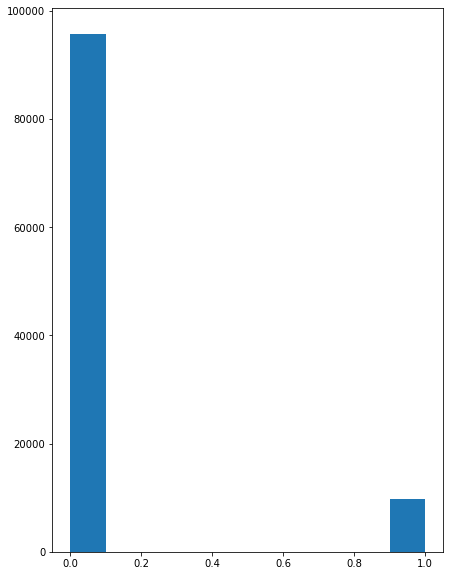

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))
plt.hist(df_filtered['loss']);

As clearly seen, the dataset is unbalanced causing ML models to not learn well.

In [18]:
from sklearn.model_selection import train_test_split

x = df_filtered.drop(columns=["loss"]).fillna(0).to_numpy()
y = df_filtered['loss'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=8)

#  BalancedBaggingClassifier

In [19]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
#Train the classifier.
bbc.fit(x_train, y_train)
preds = bbc.predict(x_test)

[[25562  6064]
 [ 2068  1112]]


<Figure size 720x720 with 0 Axes>

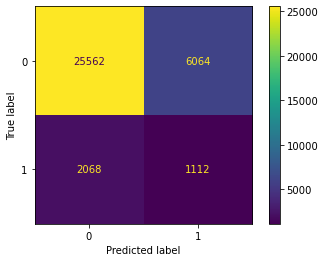

In [23]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion = confusion_matrix(y_test, preds)
print(confusion)
plt.figure(figsize=(10,10))
plot_confusion_matrix(bbc, x_test, y_test)

In [26]:
# evaluate model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

0.5789722809868642

# Over-Sampeling 

In [36]:
count_class_0, count_class_1 = df_filtered.loss.value_counts()

df_class_0 = df_filtered[df_filtered['loss'] == 0]
df_class_1 = df_filtered[df_filtered['loss'] == 1]

Random over-sampling:
0    95688
1    95688
Name: loss, dtype: int64


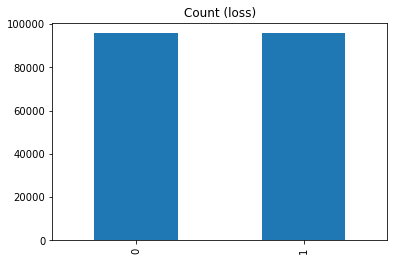

In [39]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.loss.value_counts())

df_test_over.loss.value_counts().plot(kind='bar', title='Count (loss)');

In [40]:
from sklearn.model_selection import train_test_split

x = df_test_over.drop(columns=["loss"]).fillna(0).to_numpy()
y = df_test_over['loss'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=8)

In [41]:
#knn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
pred = model.predict(x_test)
roc_auc_score(y_test, pred)

0.9321015527615494

[[27603  3999]
 [  292 31261]]


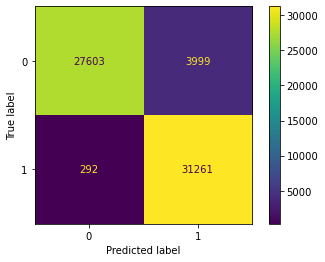

In [42]:
confusion = confusion_matrix(y_test, pred)
print(confusion)
plot_confusion_matrix(model, x_test, y_test)